<a href="https://colab.research.google.com/github/FarizKesten/MLPlayground/blob/main/PoseEstimations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Estimation

## Exploring the different 2D pose estimation approaches..


# OpenPose


# Pipeline:
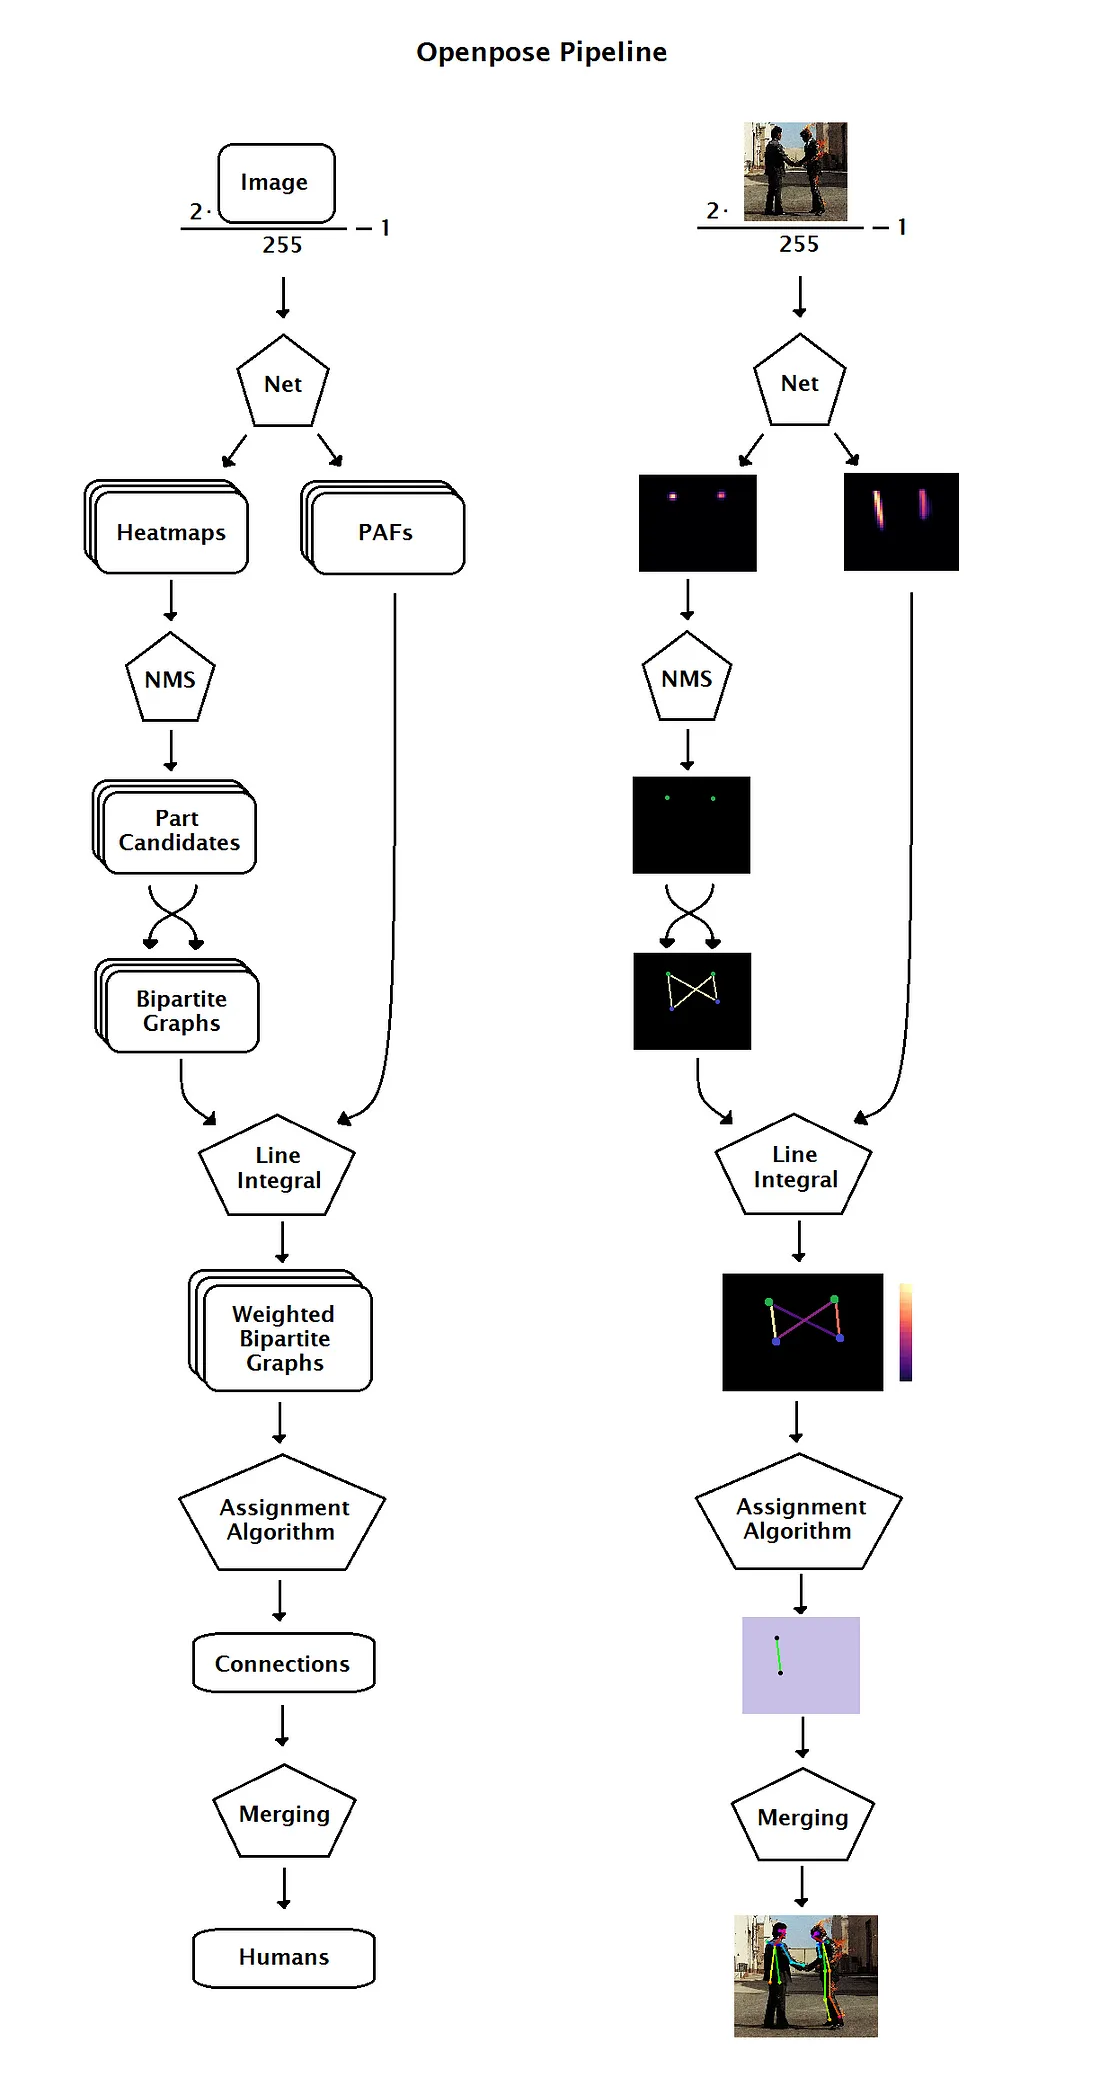

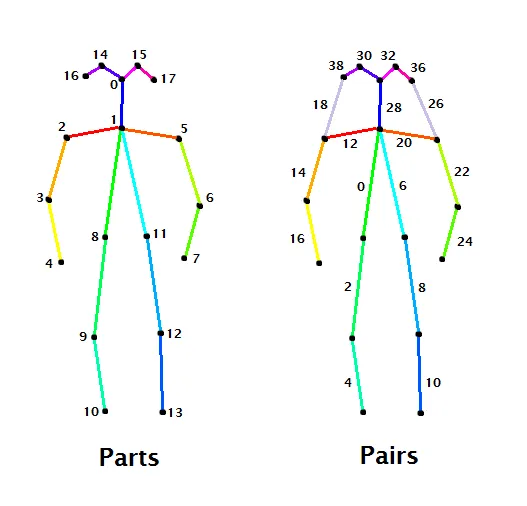

A couple explainations on the architecture:

## Part and Pairs
In OpenPose we differentiate between **parts** and **pairs**

parts represent the different points on the body, such as shoulder, elbow etc. In original paper 17 parts are defined.

pairs represent the connection between two different parts.
In original paper 38 ( 2 x 19) pairs are defined. Since pairs are practicaly represent direction, it has 2 components, x and y components. That is why it is multiplied by 2

## NMS (Non Maximum Suppression)
Algorithm used to find the point out of a headmap.Roughly how it works:

- start with first pixel of the heatmap
- surround the pixel with a window od side 5 and find the max. value in that area
- substitute the value of the center pixel of the maximum
- slide the window one pixel and repeat the steps after we have covered the entire heatmap
- Compare the result with the original heatmap. Those pixels staying with the same value are the peaks we are looking for. Suppress the other pixels setting them to 0

## Bipartite graph
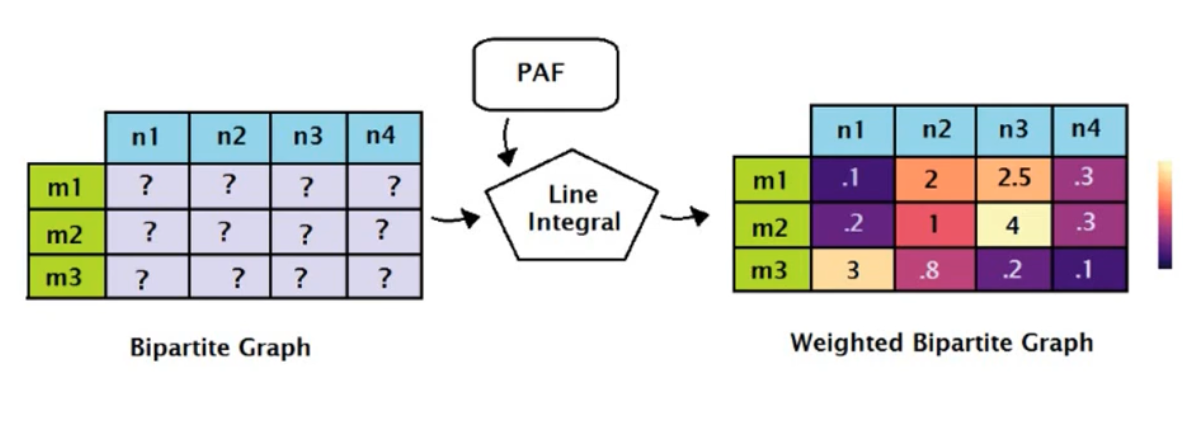
How to match different part with the others? We would have the issue when multiple similar parts are found either from the thresholding or because there are multiple persons available in the picture.
This is solved in graph-theory using the assignment-problem algo.
Basically each edge part with have weighting.

**PAF** will compute the line integral along the segment connecting each couple of part candidates, over the corresponding (x, and y) for that pair.

I found a good explaination on bipartite-graphs here: https://www.youtube.com/watch?v=HqlUbSA9cEY

## Assignment Algo
Roughly how it works:
- sort each possible connaction by its score
- The connaction with the highest score in a final connection
- Move to next possible connection. If no parts of this connection have been assigned to a final connection before, this is a final connection
- Repeat last step until we are done
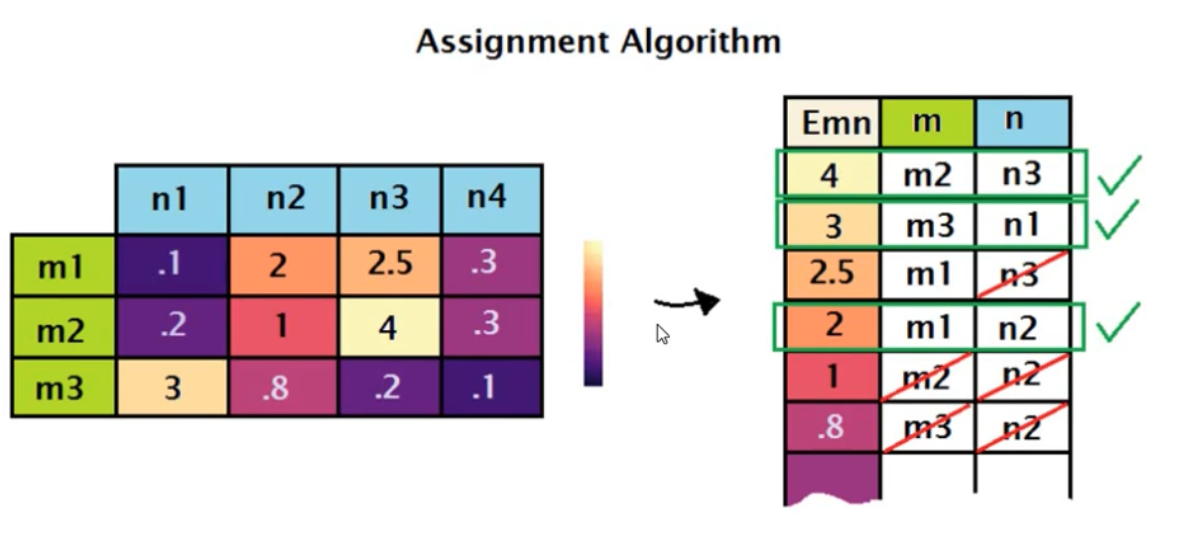





Model Architecture:
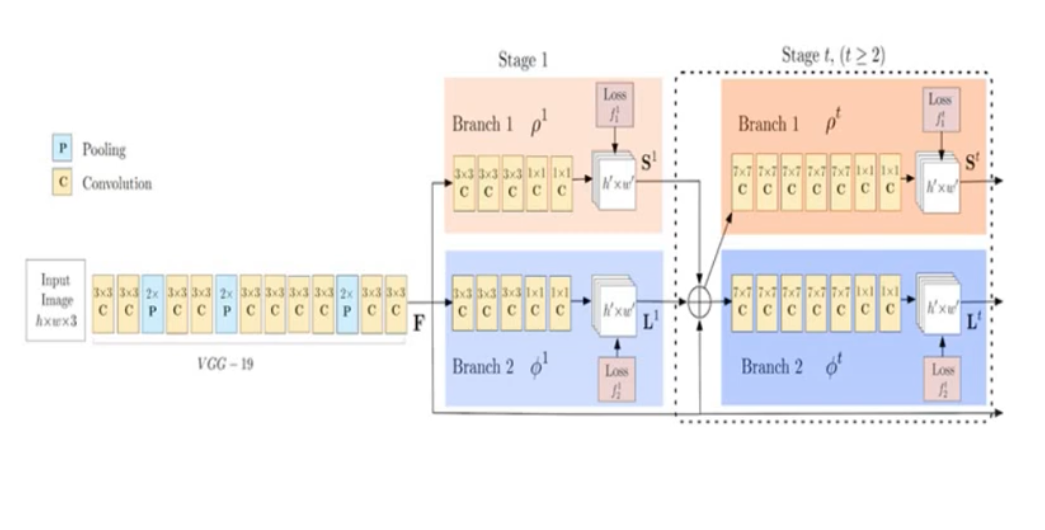




Branch1 : will output 18 heatmaps of the parts
Branch2 : will output 38 heatmaps of the pairs

### Dimensions:
Input: 224 x 224 x 3
output:
      - 224 x 224 x 57 ( 57 = 18 parts + 38 pairs + 1 bg)


In [ ]:
# Network implementation..